# Podstawy przetwarzania sygnałów - LAB

    prowadzący: Monika Wasilewska
    Politechnika Wrocławska, Katedra Akustyki, Multimediów i Przetwarzania Sygnałów
    Proszę nie rozpowszechniać plików z zajęć - z góry dziękuję :)

Run a cell via `Shift + Return`. Learn more about [CoCalc Jupyter Notebooks](https://doc.cocalc.com/jupyter.html).

### Patryk Duniak 253003

Proszę wpisać swoje dane po dwukrotnym kliknięciu myszką w komórkę. Dokładnie tam gdzie jest imię wpisujecie swoje imię itd.!

### Zajęcia 6

1. Zapoznanie się z ideą filtracji.
2. Zaprojektowanie filtrów FIR
3. Do czego mogą jeszcze służyć filtry? HRTF jako przykład filtru dającego sporo radości ;)
___

In [4]:
pkg load signal

### Zadanie 1

Wygeneruj jedną sekundę sygnału świergotowego o częstotliwości początkowej $f_p = 200 [Hz]$, częstotliwości końcowej $f_k=1200[Hz]$ i częstotliwości próbkowania równej $f_s=3000 [Hz]$. Czas narastania częstotliwości niech będzie równy długości jego trwania. Wyrysuj przebieg czasowy i widmo tego sygnału.

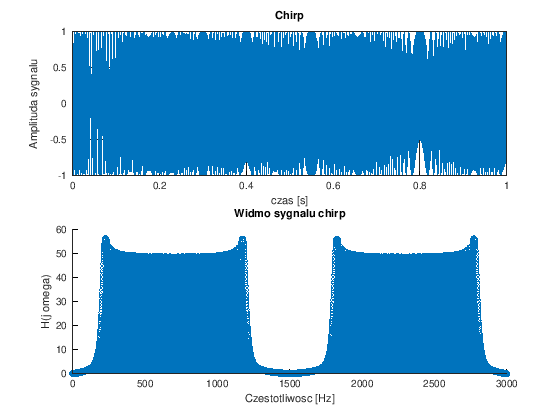

In [5]:
% tutaj jest miejsce na napisanie kodu
fs = 3000;

fp = 200;
fk = 1200;

delta_t = 1/fs;
t = 0:delta_t:1-delta_t;
sig = chirp(t, fp, 1, fk);

fft_sig=fft(sig);
abs_fft_sig=abs(fft_sig);
f_step=fs/length(abs_fft_sig);
f=0:f_step:fs-f_step;

figure
subplot(2,1,1)
plot(t, sig)
xlabel('czas [s]')
ylabel('Amplituda sygnalu')
title("Chirp")
grid on

subplot(2,1,2)
stem(f,abs_fft_sig)
title("Widmo sygnalu chirp")
xlabel("Czestotliwosc [Hz]")
ylabel("H(j omega)")





## Odpowiedź impulsowa filtru

Zaprojektujmy odpowiedź impulsową filtru FIR. Odpowiedź impulsowa filtru FIR na pobudzenie impulsowe δ[n] będące deltą Kroneckera jest równa zbiorowi współczynników filtru.

### Zadanie 2
Korzystając z funkcji __fir1__ zaprojektuj filtr dolnoprzepustowy o $M=101$ współczynnikach i częstotliwości odcięcia równej $f_c=800[Hz]$. Wyrysuj odpowiedź impulsową filtru.

(**Wskazówka:** odpowiedź impulsowa filtru jest związana z dziedziną czasu i jest wynikiem działania funkcji fir1. Doczytaj w dokumentacji w jaki sposób podać częstotliwość odcięcia do funkcji fir1)

**Pytanie:** Czy na podstawie samej odpowiedzi impulsowej jesteś w stanie stwierdzić o poprawności (zgodności z treścią zadania) zaprojektowanego filtru?

In [13]:
% help fir1

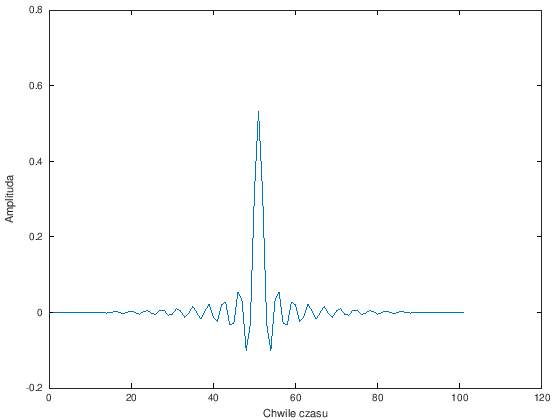

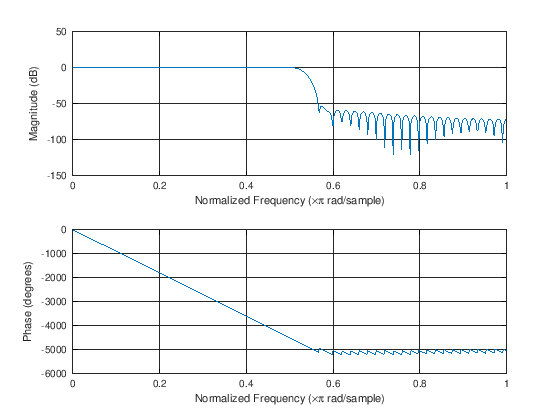

In [18]:
% tutaj jest miejece na napisanie kodu
M = 101;
fs = 3000;
fp = 200;
fk = 1200;
fc = 800/(fs/2);


h = fir1(M-1, fc, "low");

freqz(h);

figure
plot(h)
xlabel('Chwile czasu')
ylabel('Amplituda')





**Tutaj jest miejsce na odpowiedź**

Odpowiedź:

## Transmitancja filtru

Aby obserwować charakterystykę naszego filtru w dziedzinie częstotliwości będziemy korzystać z pojęcia transmitancji. Przypomnijmy zatem czym ona jest.

**Transmitancja jest transformatą Fouriera odpowiedzi impulsowej (czyli zbioru współczynników filtru).**


### Zadanie 3
Aby zaobserwować właściwości zaprojektowanego przez nas filtru w dziedzinie częstotliwości chcemy zobaczyć jak wygląda moduł transmitancji czyli charakterystyka częstotliwościowa filtru.
W tym zadaniu **wyrysuj moduł widma stworzonych wcześniej współczynników**. Pamiętaj o opisaniu osi oraz nadaniu tytułu.

**Pytanie** Czy na podstawie stworzonego wykresu jesteś w stanie określić czy filtr został zaprojektowany poprawnie? Na podstawie którego jest zrobić to łatwiej? W swojej analizie porównaj intuicyjność wykresów przedstawiających odpowiedź impulsową oraz moduł transmitancji.

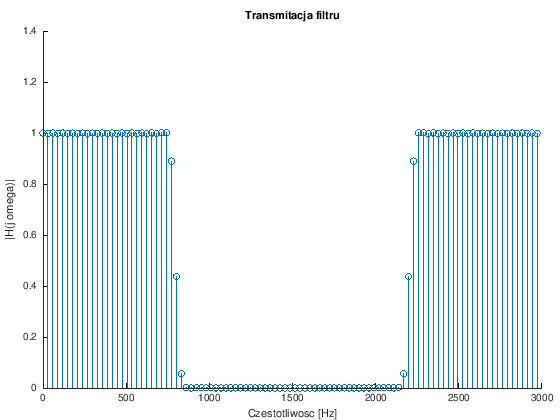

In [19]:
% tutaj jest miejsce na napisanie kodu

M = 101;
fs = 3000;
fp = 200;
fk = 1200;
fc = 800/(fs/2);


h = fir1(M-1, fc, "low");


transmitacja=abs(fft(h));

f_step=fs/length(transmitacja);

f=0:f_step:fs-f_step;

figure
stem(f, transmitacja)
title("Transmitacja filtru")
xlabel("Czestotliwosc [Hz]")
ylabel("|H(j omega)|")


**Tutaj jest miejsce na odpowiedź do zadania 3**

Odpowiedź:

## Filtracja

Filtracja w czasie wymaga obliczenia splotu z odpowiedzią impulsową filtru, natomiast przechodząc do dziedziny częstotliwości (korzystając z transmitancji) splot zamienia się w mnożenie.

### Zadanie 4

Za pomocą funkcji `filter` przefiltruj sygnał stworzony w zadaniu pierwszym w dziedzinie czasu oraz wyrysuj jego przebieg czasowy po filtracji.

**Wskazówka:** Funkcja `filter` będzie przyjmowała trzy argumenty `filter(h,1,x)` gdzie `h` oraz `x` to odpowiednio współczynniki filtru oraz sygnał w czasie.



In [8]:
% help filter

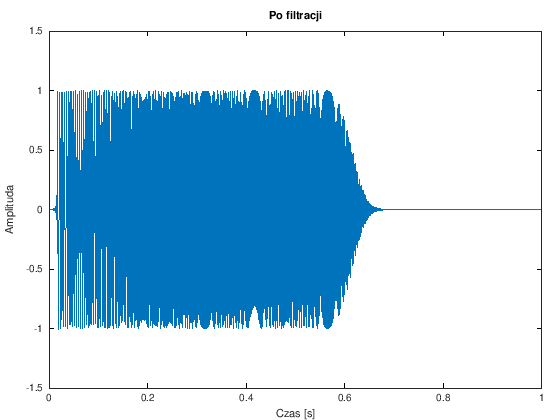

In [8]:
% tutaj jest miejsce na napisanie kodu

M = 101;
fc = 800/(fs/2);

h = fir1(M-1, fc, "low");
sig_filtered=filter(h, 1, sig);

figure
plot(t, sig_filtered)
title("Po filtracji")
ylabel("Amplituda")
xlabel("Czas [s]")

### Zadanie 5 

Aby obliczyć wynik filtracji w dziedzinie częstotliwości (mając wynik filtracji w dziedzinie czasu) wystarczy obliczyć ponownie transformatę Fouriera. Wyrysuj widmo amplitudowe obliczone na podstawie przefiltrowanego już sygnału.

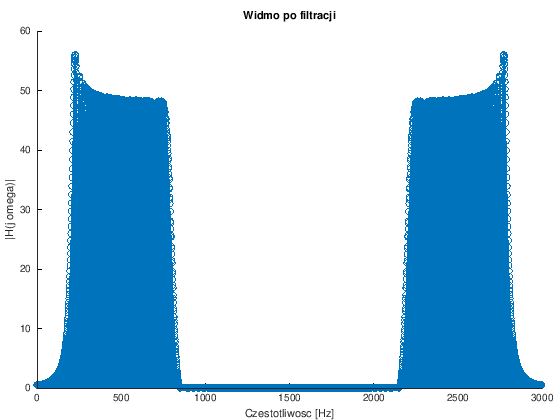

In [9]:
% tutaj jest miejsce na napisanie kodu

M = 101;
fc = 800/(fs/2);
h = fir1(M-1, fc, "low");
sig_filtered=filter(h, 1, sig);
widmo_sig_filterd=abs(fft(sig_filtered));

f_step=fs/length(widmo_sig_filterd);
f=0:f_step:fs-f_step;

figure
stem(f, widmo_sig_filterd)
title('Widmo po filtracji')
xlabel('Czestotliwosc [Hz]')
ylabel('|H(j omega)|')


## Podsumowanie

Podsumujmy nasze dzisiejsze doświadczenia - udało nam się zaprojektować swój pierwszy filtr cyfrowy!

### Zadanie 6

W pierwszej komórce poniżej narysuj pod sobą wszystkie wykresy w dziedzinie czasu (sygnał w czasie, odpowiedź impulsowa filtru oraz sygnał w czasie po filtracji). Możesz skorzystać z funkcji `subplot`.

W kolejnej komórce poniżej narysuj pod sobą wszystkie wykresy w dziedzinie częstotliwości (widmo amplitudowe sygnału, moduł transmitancji oraz moduł widma sygnału po filtracji). Możesz skorzystać z funkcji `subplot`.

Powinieneś móc zauważyć, że filtracja w dziedzinie częstotliwości to faktycznie mnożenie! :)

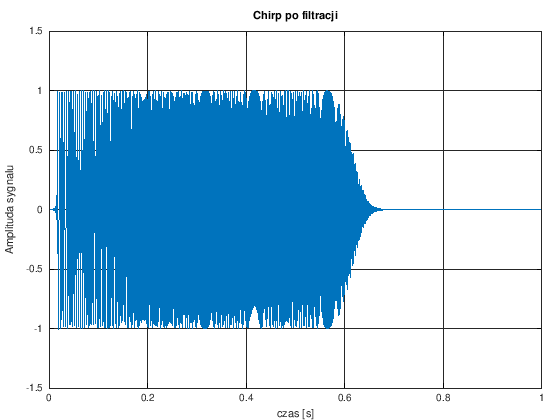

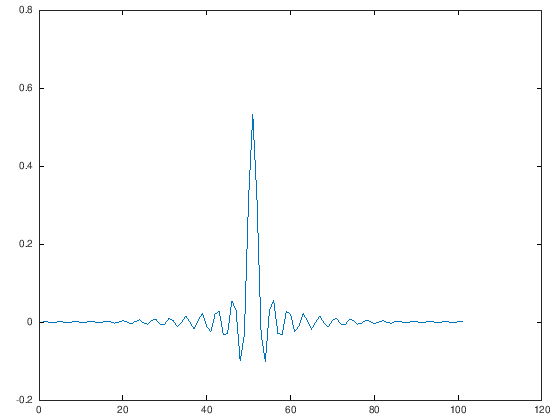

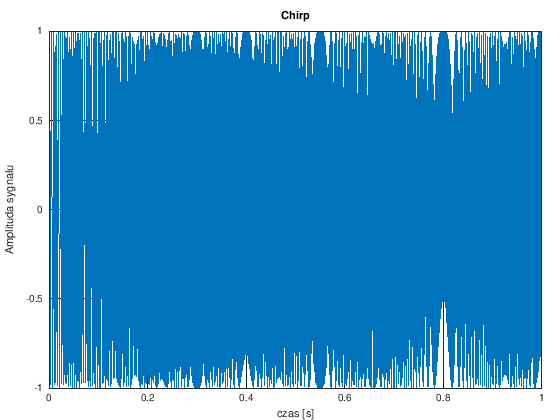

In [10]:
% wykresy w dziedzinie czasu
fs = 3000;
M=101;
fp = 200;
fk = 1200;
fc = 800/(fs/2);

h = fir1(M-1, fc, "low");
delta_t = 1/fs;
t = 0:delta_t:1-delta_t;
sig = chirp(t, fp, 1, fk);
sig_filtered=filter(h, 1, sig);


figure
plot(t, sig)
xlabel('czas [s]')
ylabel('Amplituda sygnalu')
title("Chirp")
grid on

figure
plot(h)

figure
plot(t, sig_filtered)
xlabel('czas [s]')
ylabel('Amplituda sygnalu')
title("Chirp po filtracji")
grid on




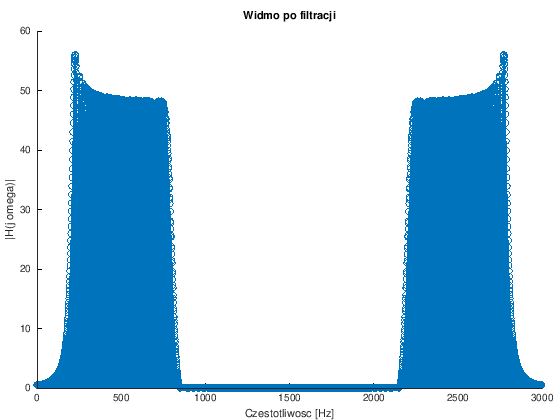

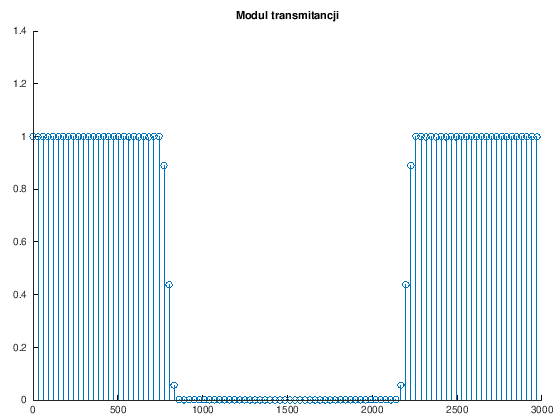

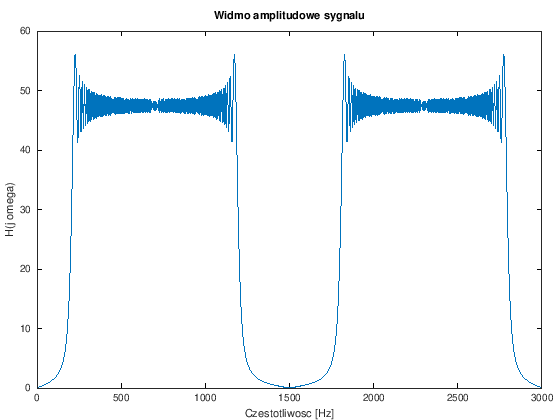

In [21]:
% wykresy w dziedzinie częstotliwości
M = 101;
fc = 800/(fs/2);
h = fir1(M-1, fc, "low");
sig = chirp(t, fp, 1, fk);
widmo_sig=abs(fft(sig));
transmitancja=abs(fft(h));
sig_filtered=filter(h, 1, sig);
widmo_sig_filterd=abs(fft(sig_filtered));

f_step=fs/length(widmo_sig);
f=0:f_step:fs-f_step;

f_step1=fs/length(transmitacja);
f1=0:f_step1:fs-f_step1;

figure
plot(f, widmo_sig)
title('Widmo amplitudowe sygnalu')
xlabel('Czestotliwosc [Hz]')
ylabel('H(j omega)')

figure
stem(f1, transmitancja)
title('Modul transmitancji')


figure
stem(f, widmo_sig_filterd)
title('Widmo po filtracji')
xlabel('Czestotliwosc [Hz]')
ylabel('|H(j omega)|')


___

## Do czego jeszcze mogą służyć filtry?

Jednymi z bardziej spektakularnych efektów mogą się pochwalić filtry HRTF, które są związane z dźwiękiem przestrzennym.

Człowiek słyszy przestrzennie dzięki analizie amplitudy, fazy oraz widma dźwięku dochodzącego do naszych uszu. Dźwięk padający z danego punktu, na przykład z prawej strony, dotrze do prawego ucha szybciej i z większą amplitudą niż do lewego. Korzystając z tych właściwości stworzone zostały współczynniki filtrów, które umożliwiają stworzenie wrażenia dochodzenia dźwięku z konkretnego miejsca w przestrzeni. Jak na pewno się spodziewacie mamy dwa osobne zestawy współczynników dla lewgo i prawego kanału dźwięku stereo, a na wyjście (gdzie użytkownik ma podłączone słuchawki) wysyłamy odpowiednio zmodyfikowany sygnał dla lewgo i prawego ucha ;). Sama filtracja absolutnie niczym się nie różni! To nadal tylko dodawanie i mnożenie... Podłączcie słuchawki i włączcie link poniżej.

https://www.youtube.com/watch?v=c6SDKfHCDm8

P.S. Mam nadzieję, że już rozumiecie dlaczego zdarza mi się powtarzać, że przetwarzanie sygnałów jest fascynujące i może sprawiać mnóstwo frajdy. Czyż to nie jest piękna dziedzina nauki? :)

___